In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


In [4]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Renaming columns for simplicity
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
print("Features and their Types:")
print(iris_df.dtypes)


Features and their Types:
sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object


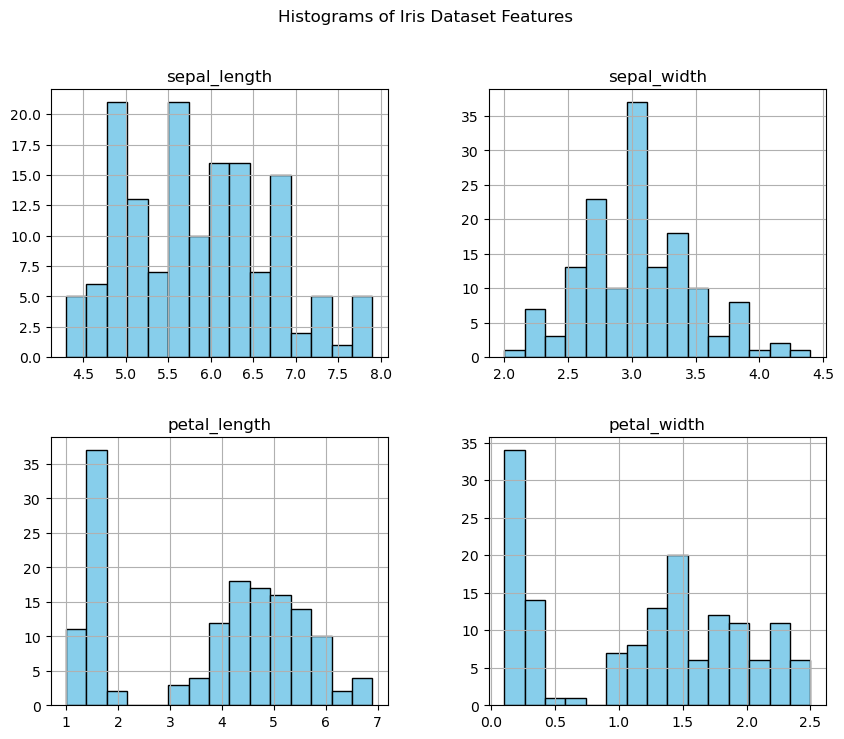

In [8]:
iris_df.hist(figsize=(10, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Iris Dataset Features')
plt.show()


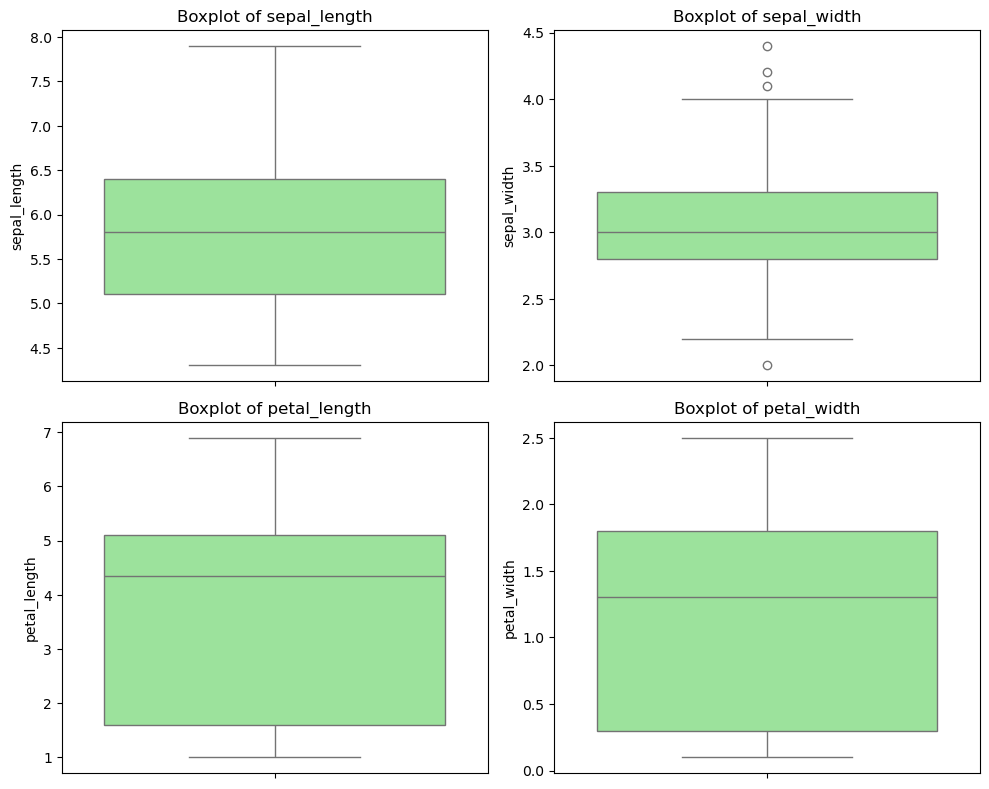

In [10]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(iris_df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=iris_df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [12]:
outliers = {}

for column in iris_df.columns[:-1]:
    Q1 = iris_df[column].quantile(0.25)
    Q3 = iris_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    count_outliers = iris_df[(iris_df[column] < lower_bound) | (iris_df[column] > upper_bound)][column].count()
    outliers[column] = count_outliers

print("Outliers Count using IQR Method:")
print(outliers)


Outliers Count using IQR Method:
{'sepal_length': 0, 'sepal_width': 4, 'petal_length': 0, 'petal_width': 0}
